In [0]:
import numpy as np
import matplotlib as mp

In [0]:
X = np.array([[0,0], [0,1], [1,0], [1,1]], dtype='float64')
Y = np.array([[0],[1],[1],[0]], dtype='float64')

In [0]:
class sigmoid:
  def __init__(self):
    pass
  
  def forward(self, h):
    return 1/(1+np.exp(-1*h))
  
  def backward(self, h):
    fo = self.forward(h)
    return fo*(1-fo)

In [0]:
class linear_combination:
  def __init__(self):
    pass
  
  def forward(self, x, w):
    return np.sum(w*x, axis=1)
  
  def backward(self, x, w):
    return x

In [0]:
class binary_cross_entropy:
  def __init__(self):
    pass
  
  def forward(self, predict, label):
    return -(label*np.log(predict) + (1-label)*np.log(1-predict))
  
  def backward(self, predict, label):
    return -(label/predict - (1-label)/(1-predict))

In [0]:
class nurel_network:
  def __init__(self, \
               input_size = 2, hidden_size = 2, output_size = 1,\
               weight_init_max = 10):
    #self.w1 = np.random.rand(hidden_size, input_size+1) * weight_init_max
    #self.w2 = np.random.rand(output_size, hidden_size+1) * weight_init_max
    self.w1 = np.array([[5, 5, -8], [-7,-7,3]], dtype = 'float64')
    self.w2 = np.array([[-11, -11, -6]], dtype = 'float64')
    
    self.activating_func = sigmoid()
    self.hypo = linear_combination()
    self.cost_func = binary_cross_entropy()
    
    self.cost = 987654321
    
    
  def train(self, X, Y, learning_rate = 0.01):
    h1 = self.hypo.forward(np.append(X, [1]), self.w1)
    sig1 = self.activating_func.forward(h1)
    h2 = self.hypo.forward(np.append(sig1, [1]), self.w2)
    sig2 = self.activating_func.forward(h2)
    
    self.cost = self.cost_func.forward(sig2, Y)
    
    dcostdcost = 1
    dcostdsig2 = self.cost_func.backward(sig2, Y)
    dsig2dh2 = self.activating_func.backward(h2)
    dh2dw2 = self.hypo.backward(np.append(X, [1]), self.w2)
    dh2dx2 = self.w2[0]
    
    self.w2 -= learning_rate * dcostdcost * dcostdsig2 * dsig2dh2 * dh2dw2*self.cost
    #print(self.w2)
    
    dcostdsig1 = self.cost_func.backward(sig1, Y)
    dsig1dh1 = self.activating_func.backward(h1).reshape(-1, 1)
    dh1dw1 = self.hypo.backward(np.append(X, [1]), self.w1).reshape(1, -1)
    
    self.w1 -= learning_rate * dcostdcost * dcostdsig2 * dsig2dh2 * dh2dx2 * dsig1dh1 * dh1dw1 *self.cost
    #print(self.w1)
    
  def accuracy(self, X, Y):
    cnt = 0
    for i in range(4):
      h1 = self.hypo.forward(np.append(X[i], [1]), self.w1)
      sig1 = self.activating_func.forward(h1)
      h2 = self.hypo.forward(np.append(sig1, [1]), self.w2)
      self.sig2 = self.activating_func.forward(h2)
      
      print(self.sig2)
      
      cnt += (self.sig2[0] >= 0.5) and Y[i]
      cnt += (self.sig2[0] < 0.5) and (not Y[i])
      
    print("accuracy", cnt/4)
    
  def test(self, X, learning_rate = 0.01):
    h1 = self.hypo.forward(np.append(X, [1]), self.w1)
    sig1 = self.activating_func.forward(h1)
    h2 = self.hypo.forward(np.append(sig1, [1]), self.w2)
    sig2 = self.activating_func.forward(h2)
    return sig2
    
    

      
    
      
    
    

In [0]:
nn = nurel_network()

In [42]:
for i in range(100000):
  for j in range(4):
    nn.train(X[j], Y[j])
    if(i%10000 == 0):
      print("cost", nn.cost)

cost [0.02700694]
cost [0.06957906]
cost [0.06967803]
cost [0.06702169]
cost [0.03492388]
cost [0.0555864]
cost [0.05568375]
cost [0.05727756]
cost [0.03861278]
cost [0.05064049]
cost [0.05073731]
cost [0.05259215]
cost [0.04079062]
cost [0.04827705]
cost [0.0483728]
cost [0.04975066]
cost [0.04235543]
cost [0.04701557]
cost [0.0471095]
cost [0.0478833]
cost [0.04366319]
cost [0.04634518]
cost [0.04643657]
cost [0.04661409]
cost [0.04488042]
cost [0.0460484]
cost [0.04613665]
cost [0.04574832]
cost [0.0461]
cost [0.04602126]
cost [0.04610584]
cost [0.04517554]
cost [0.04738524]
cost [0.04621245]
cost [0.04629294]
cost [0.04482987]
cost [0.04878988]
cost [0.04659973]
cost [0.04667577]
cost [0.0446715]


In [43]:
nn.accuracy(X, Y)

[0.04912217]
[0.95391634]
[0.95384745]
[0.04369225]
accuracy [1.]


In [0]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

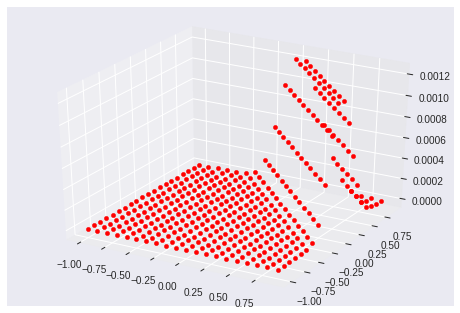

In [48]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(-10, 10):
  for j in range(-10, 10):
    ax.scatter(i * 0.1, j * 0.1, nn.test([i * 0.1, j * 0.1]), c='r', marker='o')
